In [83]:
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
import data

In [ ]:
# usando emb de 32 dim, word count 3, treinado 20 epocas, window 5

In [84]:
train_data = pd.read_csv("data/train_with_embeddings.csv")

In [85]:
train_data.columns

Index(['Unnamed: 0', 'text', 'retweets_count', 'favorites_count',
       'followers_count', 'statuses_count', 'friends_count', 'mentions',
       'urls', 'verified', 'hashtags', 'timestamp', 'TweetID', '0', '1', '2',
       '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15',
       '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27',
       '28', '29', '30', '31'],
      dtype='object')

In [86]:
train_data = train_data.drop(["Unnamed: 0"], axis=1)

In [87]:
# new features
train_data["url_count"] = train_data["urls"].apply(lambda s: s[1:-1].count("\'")/2)
train_data["text_len"] = train_data["text"].apply(lambda s: len(s))
train_data["hashtags_count"] = train_data["hashtags"].apply(lambda s: s[1:-1].count("\'")/2)
train_data["day"] = train_data["timestamp"].apply(lambda t: datetime.utcfromtimestamp(t/1000).day)
train_data["hour"] = train_data["timestamp"].apply(lambda t: datetime.utcfromtimestamp(t/1000).hour)

# text features
train_data["avg_word_len"] = train_data["text"].apply(lambda s: np.mean([len(w) for w in s.split()]))
train_data["rep_words_freq"] = train_data["text"].apply(lambda s: np.mean(len(list(set(s.split())))/len(s.split())))
train_data["rep_chars_freq"] = train_data["text"].apply(lambda s: np.mean(len(list(set(s)))/len(list(s))))
train_data["max_char_freq"] = train_data["text"].apply(lambda s: max( [s.count(c) for c in list(set(s))] )   /len(list(s)))
train_data["avg_word_count"] = train_data["text"].apply(lambda s: len(s.split()))

train_data["log"] = np.log(0.1 + train_data["favorites_count"])
train_data["sqrt"] = np.sqrt(train_data["favorites_count"])

# indicators of keywords
train_data["Macron"] =  train_data["text"].apply(lambda s: ("macron" in s.lower().split()))
train_data["Zemmour"] =  train_data["text"].apply(lambda s: ("zemmour" in s.lower().split()))
train_data["Vote"] =  train_data["text"].apply(lambda s: ("vote" in s.lower().split()) or ("votez" in s.lower().split()) or ("vot" in s.lower().split()))
# train_data["Melenchon"] =  train_data["text"].apply(lambda s: ("melenchon" in s.replace("é","e").lower().split()))

# train_data["rt"] =  train_data["text"].apply(lambda s: ("rt" in s.lower().split()))
train_data["rt"] =  train_data["text"].apply(lambda s: (s.lower().split()[0] == "rt"))    # changed!!

In [88]:
train_data = data.feature_words_arr(train_data)
train_data = data.feature_delete_stop_words(train_data, 'text_without_stopwords')
train_data = data.feature_sent_analysis(train_data, 'text_without_stopwords')
train_data = data.feature_abbrev(train_data)
display(train_data)
# # outlier removal
# train_data = train_data[train_data["retweets_count"] <= 40000]

,text,retweets_count,favorites_count,followers_count,statuses_count,friends_count,mentions,urls,verified,hashtags,...,sqrt,Macron,Zemmour,Vote,rt,text_arr,text_without_stopwords,polarity,subjectivity,abrev
0,rt refarcir macron ans nom prépare,3,0,3682,453535,3628,[],[],0,[],...,0.0,True,False,False,True,"[rt, refarcir, macron, ans, nom, prépare]",rt refarcir macron ans nom prépare,0.00,0.000,0.000000
1,populaire,0,0,86,1016,284,[],[],0,[],...,0.0,False,False,False,False,[populaire],populaire,0.50,0.500,0.000000
2,faut dégager cinglé,3,1,1944,28234,1995,[],[],0,[],...,1.0,False,False,False,False,"[faut, dégager, cinglé]",faut dégager cinglé,-0.01,-0.010,0.000000
3,enseignants mettre prescriptions président rép...,0,0,1,1072,0,[],['https://t.co/rytlted08g'],0,[],...,0.0,False,False,False,False,"[enseignants, mettre, prescriptions, président...",enseignants mettre prescriptions président rép...,0.06,0.125,0.000000
4,mafieuse oppressive macron,0,0,13957,25311,10841,[],[],0,[],...,0.0,True,False,False,False,"[mafieuse, oppressive, macron]",mafieuse oppressive macron,0.00,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353964,gonflette tour raciste frustré,0,0,34,1509,55,[],['https://t.co/pma33zhslx'],0,[],...,0.0,False,False,False,False,"[gonflette, tour, raciste, frustré]",gonflette tour raciste frustré,0.00,0.000,0.000000
353965,france caste crapuleuse encadrée gangsters irr...,0,0,89,11166,127,[],[],0,[],...,0.0,False,False,False,False,"[france, caste, crapuleuse, encadrée, gangster...",france caste crapuleuse encadrée gangsters irr...,0.10,0.200,0.000000
353966,eric zemmour français berbère,3,0,1888,712,3086,[],[],0,[],...,0.0,False,True,False,False,"[eric, zemmour, français, berbère]",eric zemmour français berbère,0.20,0.000,0.000000
353967,gauchistes dépression pq,0,0,139,486,320,[],[],0,[],...,0.0,False,False,False,False,"[gauchistes, dépression, pq]",gauchistes dépression pq,0.00,0.000,0.333333


In [89]:
# from nltk.sentiment import SentimentIntensityAnalyzer
# sia = SentimentIntensityAnalyzer()
# print("sentiment analysis...")
# train_data["compound"] =  train_data["text"].apply(lambda s: sia.polarity_scores(s)['compound'])

In [90]:
# select useful columns
train_data_filtered = train_data.drop(["text", "urls", "mentions", "hashtags", "timestamp", "TweetID",
                                        "text_arr", "text_without_stopwords"], axis=1)

In [91]:
# train_data_filtered = train_data.loc[:, ["retweets_count","favorites_count","followers_count","statuses_count","friends_count",
#                                  "hashtags_count","hour","verified","url_count","text_len","rt","Macron","Zemmour","Melenchon"]]


X_train, X_eval, y_train, y_eval = train_test_split(train_data_filtered.drop("retweets_count", axis=1),
                                                    train_data_filtered["retweets_count"],
                                                    random_state=42, test_size=0.1)

# Standardize the data
normal_columns = train_data_filtered.drop(["hour", "verified", "url_count", "rt", "retweets_count"], axis=1).columns
# normal_columns = train_data_filtered.drop(["hour", "verified", "url_count", "rt", "retweets_count"], axis=1).columns
mu, sigma = X_train[normal_columns].mean(axis=0), X_train[normal_columns].std(axis=0)
X_train.loc[:, normal_columns] = (X_train[normal_columns] - mu) / sigma
X_eval.loc[:, normal_columns] = (X_eval[normal_columns] - mu) / sigma

In [92]:
import tensorflow as tf

In [93]:
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Dense(20, activation='relu'),
#   tf.keras.layers.Dense(20, activation='relu'),
#   tf.keras.layers.Dense(20, activation='relu'),
#   tf.keras.layers.Dense(1),
# ])

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(20, activation='relu'),
  # tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(1),
])

"""model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(40, activation='relu'),
    # tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(1),
])"""

# model = tf.keras.models.Sequential([
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(1),
# ])

"model = tf.keras.models.Sequential([\n    tf.keras.layers.Dense(40, activation='relu'),\n    # tf.keras.layers.Dropout(0.1),\n    tf.keras.layers.Dense(40, activation='relu'),\n    tf.keras.layers.Dense(1),\n])"

In [94]:
model.compile(optimizer="adam", loss='mae')

In [95]:
"""import tensorflow_addons as tfa
optimizer = tfa.optimizers.AdamW(learning_rate=1e-3, weight_decay=1e-6)
model.compile(optimizer=optimizer, loss='mae')"""

"import tensorflow_addons as tfa\noptimizer = tfa.optimizers.AdamW(learning_rate=1e-3, weight_decay=1e-6)\nmodel.compile(optimizer=optimizer, loss='mae')"

In [98]:
history = model.fit(X_train.values.astype(np.float32), y_train.values.astype(np.float32), epochs=80, batch_size=1024,
         validation_data=(X_eval.values.astype(np.float32), y_eval.values.astype(np.float32)), shuffle=True)

Epoch 1/25
312/312 [==============================] - 1s 2ms/step - loss: 5.7241 - val_loss: 5.6642
Epoch 2/25
312/312 [==============================] - 1s 2ms/step - loss: 5.7155 - val_loss: 5.6520
Epoch 3/25
312/312 [==============================] - 1s 2ms/step - loss: 5.7108 - val_loss: 5.7359
Epoch 4/25
312/312 [==============================] - 1s 2ms/step - loss: 5.7144 - val_loss: 5.6726
Epoch 5/25
312/312 [==============================] - 0s 1ms/step - loss: 5.7064 - val_loss: 5.6701
Epoch 6/25
312/312 [==============================] - 1s 3ms/step - loss: 5.6953 - val_loss: 5.6764
Epoch 7/25
312/312 [==============================] - 1s 2ms/step - loss: 5.6900 - val_loss: 5.6975
Epoch 8/25
312/312 [==============================] - 1s 2ms/step - loss: 5.7032 - val_loss: 5.7032
Epoch 9/25
312/312 [==============================] - 1s 2ms/step - loss: 5.6843 - val_loss: 5.6783
Epoch 10/25
312/312 [==============================] - 1s 3ms/step - loss: 5.6778 - val_loss: 5.6909

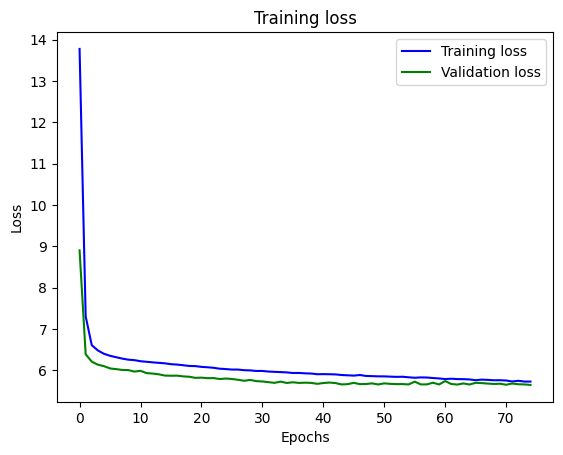

In [97]:
plt.plot(history.epoch, history.history["loss"], 'b', label='Training loss')
plt.plot(history.epoch, history.history["val_loss"], 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [45]:
model.evaluate(X_eval.values.astype(np.float32),  y_eval.values.astype(np.float32), verbose=2)

1107/1107 - 0s - loss: 6.0695 - 497ms/epoch - 449us/step


6.06954288482666

In [17]:
pred = model.predict(X_eval.values.astype(np.float32))
print(pred)

1107/1107 [==============================] - 0s 367us/step
[[-3.8322471e-03]
 [-7.4711069e-04]
 [-5.0463900e-04]
 ...
 [-2.1370314e-03]
 [-2.6850365e-03]
 [ 1.6587729e+01]]


In [18]:
eval_data = X_eval.copy()
eval_data ["groundtruth"] = y_eval
eval_data["pred"] = pred

In [19]:
eval_data

,favorites_count,followers_count,statuses_count,friends_count,verified,0,1,2,3,4,...,log,Macron,Zemmour,Vote,rt,polarity,subjectivity,abrev,groundtruth,pred
307625,-0.055089,-0.077407,-0.334165,-0.497254,0,1.535138,0.001031,-1.472968,-0.771349,-1.273339,...,-0.564477,-0.601175,-0.379343,-0.257806,False,0.794312,-0.754931,-0.389772,0,-0.003832
52950,-0.055089,-0.077779,-0.408998,-0.502035,0,1.046139,-0.893833,-1.752839,1.370994,-1.571936,...,-0.564477,-0.601175,-0.379343,-0.257806,False,0.989324,0.480421,-0.389772,0,-0.000747
289882,-0.055089,-0.067681,2.979071,1.399853,0,1.369111,-0.426967,0.620751,-2.074152,1.424168,...,-0.564477,-0.601175,-0.379343,-0.257806,True,-1.459153,0.963819,-0.389772,0,-0.000505
17637,-0.055089,-0.075549,0.847381,-0.566985,0,0.242622,0.355079,0.797423,0.275174,0.690548,...,-0.564477,-0.601175,-0.379343,-0.257806,True,0.144274,0.534132,2.679304,0,0.000593
339255,-0.053906,-0.028786,-0.027463,0.115989,0,0.210926,1.776944,-0.798671,1.251465,-2.058538,...,0.474196,1.663403,-0.379343,-0.257806,False,-0.072405,-0.754931,-0.389772,1,1.647873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308634,-0.055089,-0.071539,0.205442,0.380173,0,-0.216226,0.135003,-0.790920,-0.580679,0.214126,...,-0.564477,-0.601175,-0.379343,-0.257806,False,-0.072405,-0.754931,-0.389772,3,-0.002709
276530,-0.053906,-0.077630,-0.393446,-0.539890,0,-2.282618,-0.264207,-0.276957,-1.500341,-0.874692,...,0.474196,-0.601175,-0.379343,-0.257806,False,0.216501,-0.110400,-0.389772,3,1.334405
302150,-0.055089,-0.076848,-0.012975,-0.174096,0,-0.744128,0.304306,-0.382525,-0.276123,0.650591,...,-0.564477,-0.601175,-0.379343,-0.257806,False,-0.397424,-0.325244,1.802425,0,-0.002137
55651,-0.055089,-0.077729,-0.401657,-0.502434,0,0.343937,0.518112,-1.444739,-0.309734,-0.472250,...,-0.564477,-0.601175,-0.379343,3.878877,False,-0.072405,-0.754931,-0.389772,0,-0.002685


In [20]:
# eval_data.to_csv("pred_example_58")

In [21]:
# plt.scatter(X_train["favorites_count"], model.predict(X_train))
# plt.scatter(X_train["favorites_count"], y_train.values.astype(np.float32))

In [22]:
# evaluation

eval_data = pd.read_csv("data/evaluation_with_embeddings.csv")
eval_data = eval_data.drop(["Unnamed: 0"], axis=1)
tweets = eval_data["TweetID"]

In [23]:
eval_data["url_count"] = eval_data["urls"].apply(lambda s: s[1:-1].count("\'")/2)
eval_data["text_len"] = eval_data["text"].apply(lambda s: len(s))
eval_data["hashtags_count"] = eval_data["hashtags"].apply(lambda s: s[1:-1].count("\'")/2)
eval_data["day"] = eval_data["timestamp"].apply(lambda t: datetime.utcfromtimestamp(t/1000).day)
eval_data["hour"] = eval_data["timestamp"].apply(lambda t: datetime.utcfromtimestamp(t/1000).hour)
# eval_data["Macron"] =  eval_data["text"].apply(lambda s: ("macron" in s.lower().split()))
# eval_data["Zemmour"] =  eval_data["text"].apply(lambda s: ("zemmour" in s.lower().split()))
# eval_data["Melenchon"] =  eval_data["text"].apply(lambda s: ("melenchon" in s.lower().split()))
eval_data["avg_word_len"] = eval_data["text"].apply(lambda s: np.mean([len(w) for w in s.split()]))
eval_data["rep_words_freq"] = eval_data["text"].apply(lambda s: np.mean(len(list(set(s.split())))/len(s.split())))
eval_data["rep_chars_freq"] = eval_data["text"].apply(lambda s: np.mean(len(list(set(s)))/len(list(s))))
eval_data["max_char_freq"] = eval_data["text"].apply(lambda s: max( [s.count(c) for c in list(set(s))] )/len(list(s)))
eval_data["avg_word_count"] = eval_data["text"].apply(lambda s: len(s.split()))

eval_data["log"] = np.log(0.1 + eval_data["favorites_count"])

# indicators of keywords
eval_data["Macron"] =  eval_data["text"].apply(lambda s: ("macron" in s.lower().split()))
eval_data["Zemmour"] =  eval_data["text"].apply(lambda s: ("zemmour" in s.lower().split()))
# eval_data["Melenchon"] =  eval_data["text"].apply(lambda s: ("melenchon" in s.replace("é","e").lower().split()))
eval_data["rt"] =  eval_data["text"].apply(lambda s: ("rt" in s.lower().split()))

# print("sentiment analysis...")
# eval_data["compound"] =  eval_data["text"].apply(lambda s: sia.polarity_scores(s)['compound'])

eval_data = data.feature_words_arr(eval_data)
eval_data = data.feature_delete_stop_words(eval_data, 'text_without_stopwords')
eval_data = data.feature_sent_analysis(eval_data, 'text_without_stopwords')
eval_data = data.feature_abbrev(eval_data)

eval_data = eval_data.drop(["text", "urls", "mentions", "hashtags", "timestamp", "TweetID",
                                        "text_arr", "text_without_stopwords"], axis=1)

# normalize
eval_data.loc[:, normal_columns] = (eval_data.loc[:, normal_columns] - mu) / sigma

display(eval_data)

KeyError: "['Vote'] not in index"

In [ ]:
display(X_train)

In [ ]:
pred = model.predict(eval_data.values.astype(np.float32))

print(pred)

# output normalization
for i,p in enumerate(pred):
    if p<0: pred[i] = 0

In [ ]:
with open("data/predictions.csv", 'w') as f:
    writer = csv.writer(f)
    writer.writerow(["TweetID", "retweets_count"])
    for index, prediction in enumerate(pred):
        writer.writerow([str(tweets[index]) , str(int(prediction))])